In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

In [7]:
df = pd.read_csv("temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [8]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [9]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [11]:
df = pd.get_dummies(df)
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [12]:
# Confirmando a mudança do Dtype da tabela "Week"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    int64  
 4   temp_1          348 non-null    int64  
 5   average         348 non-null    float64
 6   actual          348 non-null    int64  
 7   forecast_noaa   348 non-null    int64  
 8   forecast_acc    348 non-null    int64  
 9   forecast_under  348 non-null    int64  
 10  friend          348 non-null    int64  
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

In [13]:
# Divisão da base em treinamento e teste

from sklearn.model_selection import train_test_split

x = df[['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 
        'forecast_under', 'friend', 'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 
        'week_Wed']]
y = df['actual']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [90]:
# Cria árvore para regressão

model = DecisionTreeRegressor(random_state = 42)

In [97]:
# Parâmetros vistos acima e que estavam presentes no sklearn.tree.decisiontreeregressor
# Varie alguns parâmetros e avalie por meio de validação cruzada considerando que se trata de uma série temporal 


lista_parametros = { 'criterion' : ['mse', 'friedman_mse', 'mae'],
                    'max_depth' : [1, 2, 3, 4, 5, None],
                    'max_features' : ['auto', 'sqrt', 'log2', None],
                    'max_leaf_nodes' : [2, 3, 4, 5, None],
                    'min_samples_leaf' : [1, 2, 3, 4, 5], # Default = 1
                    'min_samples_split' : [2, 3, 4, 5], # Default = 2
                   'splitter' : ['best', 'random']
                   }
# Queria ter usado '=', por exemplo... criterion = 'mse', mas tive o seguinte erro
# unhashable type: 'list', portanto tive que usar ':'

In [98]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

tss = TimeSeriesSplit(n_splits = 5, max_train_size = None)

clf = GridSearchCV(model, param_grid = lista_parametros, cv = tss, n_jobs = -1)
# Exhaustive search over specified parameter values for an estimator.

In [103]:
clf_treino = clf.fit(x_train, y_train)

print(clf_treino.best_score_)
print(clf_treino.best_params_)

0.7449460280942587
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [109]:
# 3. Treine o modelo final e avalie-o na base de testes
# Utilize os melhores parâmetros descobertos na etapa anterior, use o modelo para predizer a temperatura (actual) 
# na base de testes

prediction = clf.predict(x_test)
prediction

array([74., 60., 52., 65., 69., 74., 74., 83., 60., 74., 60., 83., 40.,
       60., 74., 55., 63., 60., 55., 83., 65., 55., 69., 60., 55., 52.,
       65., 47., 60., 74., 74., 65., 55., 83., 74., 60., 52., 52., 74.,
       40., 74., 60., 74., 44., 60., 74., 52., 74., 52., 40., 40., 44.,
       65., 65., 74., 60., 55., 60., 52., 55., 65., 52., 60., 74., 60.,
       60., 74., 74., 74., 40., 74., 55., 60., 52., 52., 65., 47., 74.,
       40., 52., 52., 65., 74., 74., 65., 55., 40., 74., 60., 83., 65.,
       52., 52., 52., 74., 40., 45., 40., 74., 74., 45., 74., 74., 52.,
       74.])

In [110]:
# E avalie o resultado

# from sklearn.metrics import classification_report
# print(classification_report(y_test, clf.predict(x_test)))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Erro médio: ", mean_squared_error(y_test, prediction))
print("Variância: ", r2_score(y_test, prediction))

Erro médio:  29.866666666666667
Variância:  0.8091882620184507


[Text(182.34642857142856, 195.696, 'X[4] <= 59.5\nmae = 9.457\nsamples = 243\nvalue = 63.0'),
 Text(95.65714285714286, 152.208, 'X[5] <= 46.85\nmae = 5.296\nsamples = 98\nvalue = 52.0'),
 Text(47.82857142857143, 108.72, 'X[1] <= 6.5\nmae = 3.32\nsamples = 25\nvalue = 43.0'),
 Text(23.914285714285715, 65.232, 'X[5] <= 46.1\nmae = 1.875\nsamples = 8\nvalue = 45.0'),
 Text(11.957142857142857, 21.744, 'mae = 1.0\nsamples = 4\nvalue = 44.0'),
 Text(35.871428571428574, 21.744, 'mae = 2.25\nsamples = 4\nvalue = 47.0'),
 Text(71.74285714285715, 65.232, 'X[8] <= 46.5\nmae = 3.176\nsamples = 17\nvalue = 41.0'),
 Text(59.785714285714285, 21.744, 'mae = 2.923\nsamples = 13\nvalue = 40.0'),
 Text(83.7, 21.744, 'mae = 2.25\nsamples = 4\nvalue = 45.0'),
 Text(143.4857142857143, 108.72, 'X[3] <= 57.5\nmae = 3.658\nsamples = 73\nvalue = 54.0'),
 Text(119.57142857142857, 65.232, 'X[4] <= 55.5\nmae = 2.981\nsamples = 54\nvalue = 52.0'),
 Text(107.61428571428571, 21.744, 'mae = 2.415\nsamples = 41\nvalue 

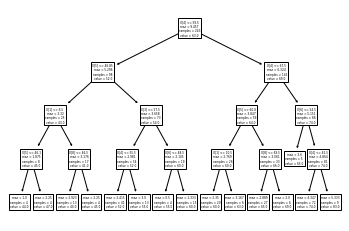

In [114]:
# 4. Exiba a árvore final em texto simples e como uma imagem

tree.plot_tree(clf.best_estimator_)

In [ ]:
# 5. Extra: exiba a predição e os dados reais (eixo y) vs a data (eixo x)

